In [1]:
import matplotlib.pyplot as plt
import numpy as np
import csv

# Experimental Results

data_file = open('Prediction Accuracy Data.csv', 'r')
reader = csv.reader(data_file, delimiter=',')

# Get benchmark names
names = next(reader)
names.pop(0)

# Get conditions run and results
results = []
for row in reader:
    condition = row.pop(0)
    
    results.append((condition, np.array(row).astype(np.float)))

number_of_trials = len(results)

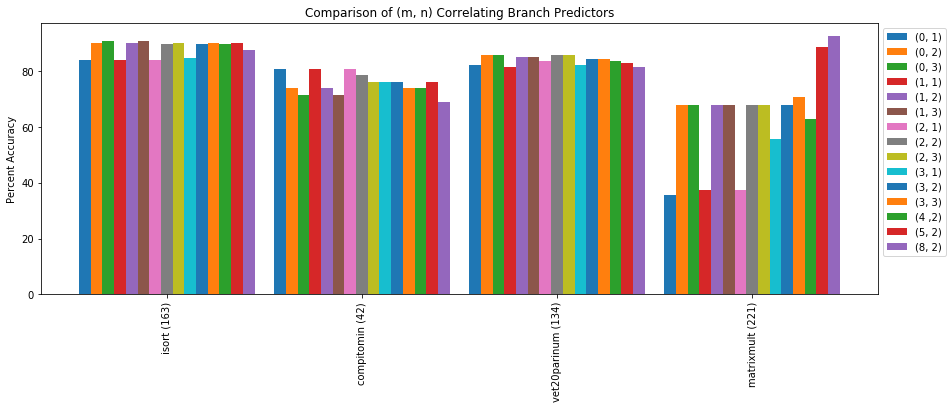

In [2]:
# Values to calculate layout
band_buffer_size = 0.1
width = (1 - band_buffer_size)/number_of_trials
ind = np.arange(len(names))

# Format the plot
plt.rcParams["figure.figsize"] = (15, 5)
fig, ax = plt.subplots()
ax.set_ylabel("Percent Accuracy")
ax.set_title("Comparison of (m, n) Correlating Branch Predictors")
ax.set_xticks(ind)
ax.set_xticklabels(names)

# Add values for each condition
for test, i in zip(results, range(len(results))):
    name = test[0]
    data = test[1]
    ax.bar(ind + width/2.0 - 0.5 + band_buffer_size/2 + i*width, 
           data, 
           width, 
           label=name)

# Generate legend and display
ax.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
plt.xticks(rotation=90)
plt.show()